# Comparing the performance of a model depending on the training/validation/test set distribution

In [2]:
import pandas
import sklearn
import scipy
from sklearn import model_selection, linear_model, preprocessing, metrics, ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from scipy import cluster
from scipy.cluster import hierarchy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
rxns_df_x = pandas.read_csv("godineau2023_reactions_OHE1.csv")
rxns_df_x = rxns_df_x.drop('Unnamed: 0', axis=1)
rxns_df_x = rxns_df_x.drop('Round', axis=1)
rxns_df_y = pandas.read_csv("godineau2023_yields_OHE.csv")
rxns_df_y = rxns_df_y.drop('Unnamed: 0', axis=1)

In [5]:
model = RandomForestRegressor(random_state=42)
#validation
def validation(x_val, y_val):
    y_val_pred = model.predict(x_val)
#accuracy = model.score(y_val_pred, y_val)
    accuracy = r2_score(y_val, y_val_pred)
    print(f'Validation Accuracy with r2 :{accuracy}')
    MAE_val = mean_absolute_error(y_val, y_val_pred)
    RMSE_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f"Validation RMSE:{RMSE_val}")
    print(f'Validation MAE:{MAE_val}')
    return y_val_pred

#testing
def testing(x_test, y_test):
    y_test_pred = model.predict(x_test)
    accuracy_test = r2_score(y_test, y_test_pred)
#accuracy_test = model.score(y_test_pred, y_test)
    print(f'Test Set Accuracy with r2 : {accuracy_test}')
    MAE_test = mean_absolute_error(y_test, y_test_pred)
    RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f"Test RMSE:{RMSE_test}")
    print(f'Test MAE:{MAE_test}')
    return y_test_pred

## 90/5/5

In [6]:
x_train90, x_temp, y_train90, y_temp = train_test_split(rxns_df_x, rxns_df_y, test_size=0.1, random_state=42)
x_val5, x_test5, y_val5, y_test5 = train_test_split(x_temp, y_temp, test_size=0.5,random_state=42)

In [7]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train90, y_train90)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(random_state=42)

In [8]:
validation(x_val5, y_val5)

Validation Accuracy with r2 :0.7317925098201055
Validation RMSE:10.740095522852675
Validation MAE:8.330969230769231


array([29.7027, 19.167 , 15.9561, 22.6753,  6.063 , 26.2045, 14.7148,
        0.8221,  2.1207, 58.862 ,  5.8443, 36.6741, 27.4172])

In [9]:
testing(x_test5, y_test5)

Test Set Accuracy with r2 : 0.7084584848512654
Test RMSE:10.020776572808265
Test MAE:7.811535714285719


array([34.1275, 15.945 , 52.8496,  5.0471,  3.3446, 48.043 ,  8.4692,
       12.0824, 47.9121,  1.1291, 11.0765, 35.294 , 28.1919, 53.6155])

Both the test set and validation set accuracies are very satisfactory for this model.

Text(0, 0.5, 'Predicted')

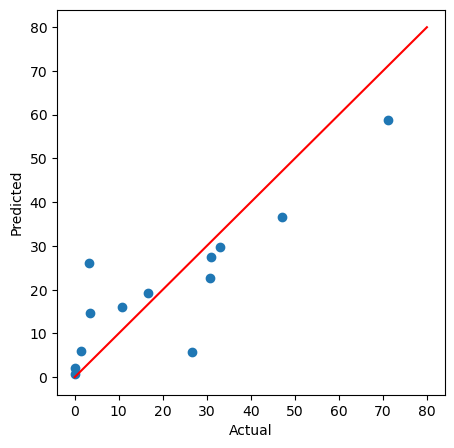

In [41]:
plt.figure(figsize=(5,5))
plt.scatter(y_val5,np.array([29.7027, 19.167 , 15.9561, 22.6753,  6.063 , 26.2045, 14.7148,
        0.8221,  2.1207, 58.862 ,  5.8443, 36.6741, 27.4172]))
plt.plot([0,80],[0,80], 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

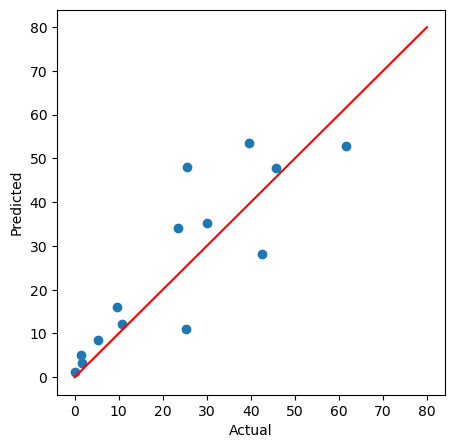

In [42]:
plt.figure(figsize=(5,5))
plt.scatter(y_test5,np.array([34.1275, 15.945 , 52.8496,  5.0471,  3.3446, 48.043 ,  8.4692,
       12.0824, 47.9121,  1.1291, 11.0765, 35.294 , 28.1919, 53.6155]))
plt.plot([0,80],[0,80], 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')

We can also see how accurate our model is visually. 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


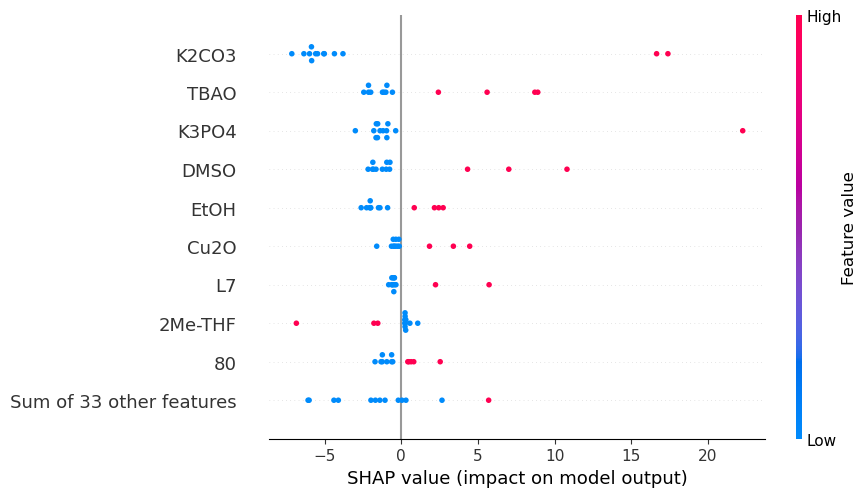

In [10]:
explainer = shap.Explainer(model, x_train90)
shap_values = explainer(x_val5, check_additivity=False)
shap.plots.beeswarm(shap_values)

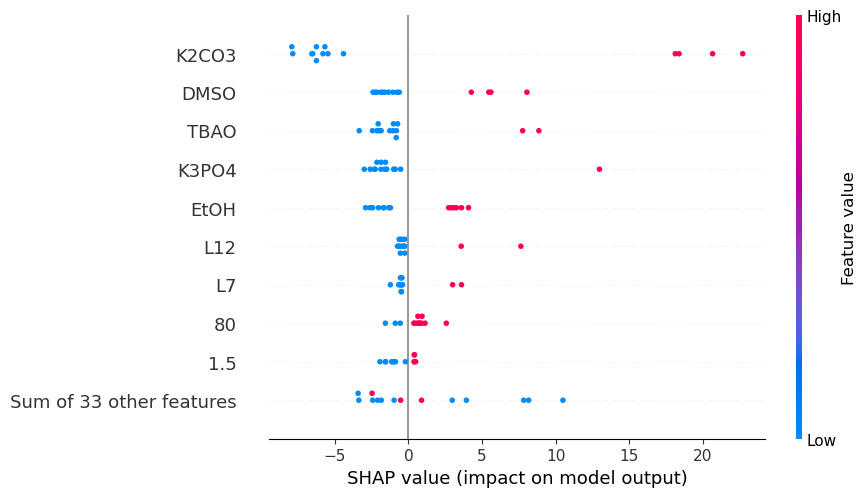

In [11]:
explainer = shap.Explainer(model, x_train90)
shap_values = explainer(x_test5, check_additivity=False)
shap.plots.beeswarm(shap_values)

For both the test and validation sets, the SHAP values are in accordance with previous observations made in data_exploration.ipynb.

## 80/10/10

In [12]:
x_train80, x_temp, y_train80, y_temp = train_test_split(rxns_df_x, rxns_df_y, test_size=0.2, random_state=42)
x_val10, x_test10, y_val10, y_test10 = train_test_split(x_temp, y_temp, test_size=0.5,random_state=42)

In [13]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train80, y_train80)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(random_state=42)

In [14]:
validation(x_val10, y_val10)

Validation Accuracy with r2 :0.7448681933302931
Validation RMSE:11.322791103379462
Validation MAE:8.461923076923076


array([39.6406,  4.9091, 22.9078, 58.8611, 25.78  , 39.8535, 27.3329,
       42.8717, 12.2276,  4.9586, 37.6225,  1.4443,  8.8389,  6.7382,
       31.1622, 62.1992, 22.4621, 25.692 ,  7.3174,  0.9164,  7.3174,
       66.2209,  8.4779, 69.5124,  8.835 ,  3.6469])

In [15]:
testing(x_test10, y_test10)

Test Set Accuracy with r2 : 0.5411712063072343
Test RMSE:13.452722537312876
Test MAE:9.516355555555549


array([44.5869, 49.4057, 49.9819, 45.4183, 20.3919, 28.894 , 14.4084,
       10.3234, 18.4118, 64.1319, 14.1176, 49.8433, 18.5918, 27.413 ,
       16.2901, 34.9763, 23.6212,  1.2328, 15.0898, 27.6813, 21.6884,
       29.5596, 44.0133, 11.3091, 19.7552, 60.8245, 22.0293])

While the accuracy of the validation set is the highest we have seen and will see, but the test set performs significantly less well. There could be a slight overfitting issue here.

Text(0, 0.5, 'Predicted')

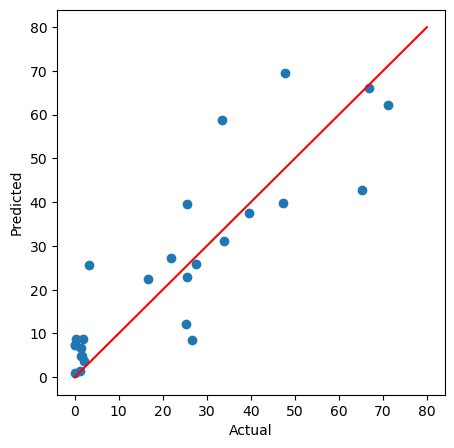

In [43]:
plt.figure(figsize=(5,5))
plt.scatter(y_val10,np.array([39.6406,  4.9091, 22.9078, 58.8611, 25.78  , 39.8535, 27.3329,
       42.8717, 12.2276,  4.9586, 37.6225,  1.4443,  8.8389,  6.7382,
       31.1622, 62.1992, 22.4621, 25.692 ,  7.3174,  0.9164,  7.3174,
       66.2209,  8.4779, 69.5124,  8.835 ,  3.6469]))
plt.plot([0,80],[0,80], 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

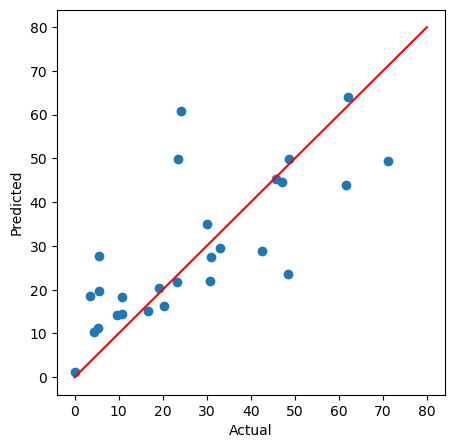

In [45]:
plt.figure(figsize=(5,5))
plt.scatter(y_test10,np.array([44.5869, 49.4057, 49.9819, 45.4183, 20.3919, 28.894 , 14.4084,
       10.3234, 18.4118, 64.1319, 14.1176, 49.8433, 18.5918, 27.413 ,
       16.2901, 34.9763, 23.6212,  1.2328, 15.0898, 27.6813, 21.6884,
       29.5596, 44.0133, 11.3091, 19.7552, 60.8245, 22.0293]))
plt.plot([0,80],[0,80], 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')

We can see graphically as well that the validation set is predicted more accurately than the test set.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


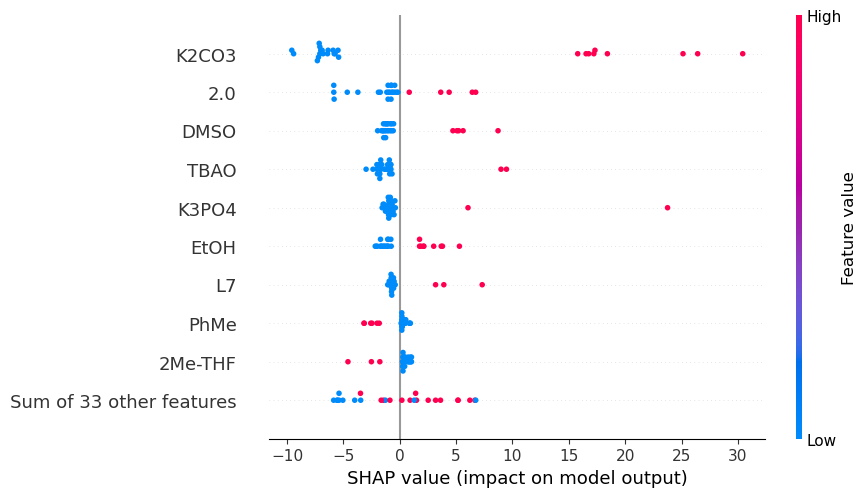

In [16]:
explainer = shap.Explainer(model, x_train80)
shap_values = explainer(x_val10, check_additivity=False)
shap.plots.beeswarm(shap_values)

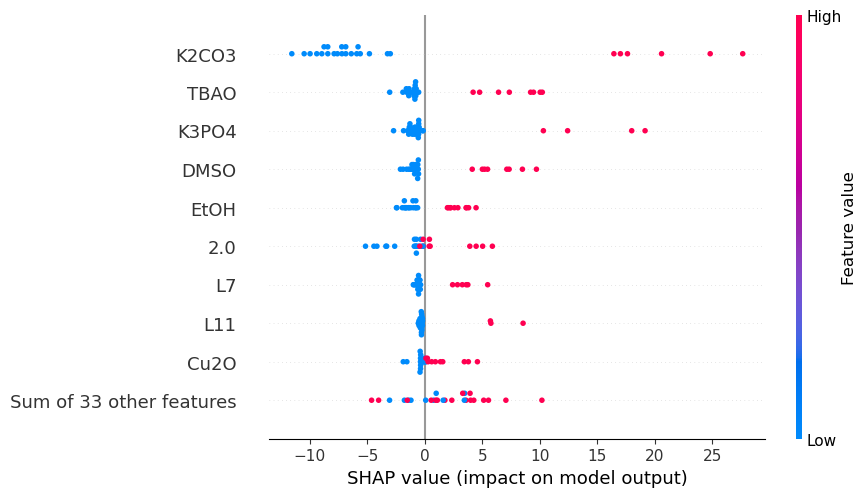

In [17]:
explainer = shap.Explainer(model, x_train80)
shap_values = explainer(x_test10, check_additivity=False)
shap.plots.beeswarm(shap_values)

The highest SHAP values seen in the test set do not necessarily correspond to those of the validation set. Some of the "worse" parameters like 2Me-THF and PhMe are not well identified in the test set, which could explain its lower accuracy. Nevertheless that does not make its identification of the 2.0 base equivalent as well as L11 wrong--this depends on the data set anyways, but it's still worth noting.

## 70/15/15

In [18]:
x_train70, x_temp, y_train70, y_temp = train_test_split(rxns_df_x, rxns_df_y, test_size=0.3, random_state=42)
x_val15, x_test15, y_val15, y_test15 = train_test_split(x_temp, y_temp, test_size=0.5,random_state=42)

In [19]:
model.fit(x_train70, y_train70)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(random_state=42)

In [20]:
validation(x_val15, y_val15)

Validation Accuracy with r2 :0.6559912518190225
Validation RMSE:11.991344290518471
Validation MAE:8.949907500000004


array([19.3016, 18.7456, 13.4832,  3.5039, 37.9033,  2.015 , 28.2986,
       54.6787, 65.8264, 18.7775, 20.2663, 43.2772, 34.2367, 57.0326,
       44.3195, 15.8837, 29.5778,  1.0808, 24.5759, 33.4579,  1.1713,
       41.105 , 61.048 , 50.2097, 31.9953, 18.2578, 13.1994, 22.4525,
       26.6785, 17.8188,  6.0338,  9.0511, 37.6987,  5.4035,  4.8604,
        1.1713, 39.7762, 12.9484,  7.788 ,  9.5756])

In [21]:
testing(x_test15,y_test15)

Test Set Accuracy with r2 : 0.6839271645671224
Test RMSE:12.108793196444061
Test MAE:9.169302499999999


array([25.6869, 12.0299, 20.832 , 28.533 , 28.1252, 69.8685, 62.4917,
       40.2974, 37.0569, 37.4402, 21.2109, 26.6004, 18.3253,  9.4084,
        4.4953, 46.0245, 13.5579, 12.0242, 12.8628,  3.0812, 42.3837,
       13.3361, 35.8519, 49.6999, 16.3406,  4.5537, 61.1439,  9.1776,
       10.4133, 39.6741, 18.037 ,  6.2518,  6.0338,  9.394 , 27.2498,
       42.0303,  3.4069, 21.6324, 16.4631, 12.1688])

The two accuracies are very close for this model. By giving more data to the model, the problem of overfitting is solved. Still, the 90/5/5 model remains the most performant.

Text(0, 0.5, 'Predicted')

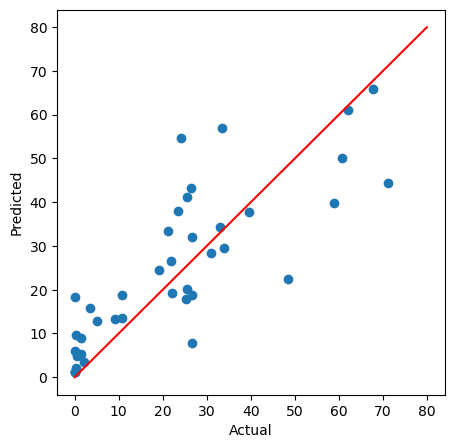

In [46]:
plt.figure(figsize=(5,5))
plt.scatter(y_val15,np.array([19.3016, 18.7456, 13.4832,  3.5039, 37.9033,  2.015 , 28.2986,
       54.6787, 65.8264, 18.7775, 20.2663, 43.2772, 34.2367, 57.0326,
       44.3195, 15.8837, 29.5778,  1.0808, 24.5759, 33.4579,  1.1713,
       41.105 , 61.048 , 50.2097, 31.9953, 18.2578, 13.1994, 22.4525,
       26.6785, 17.8188,  6.0338,  9.0511, 37.6987,  5.4035,  4.8604,
        1.1713, 39.7762, 12.9484,  7.788 ,  9.5756]))
plt.plot([0,80],[0,80], 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

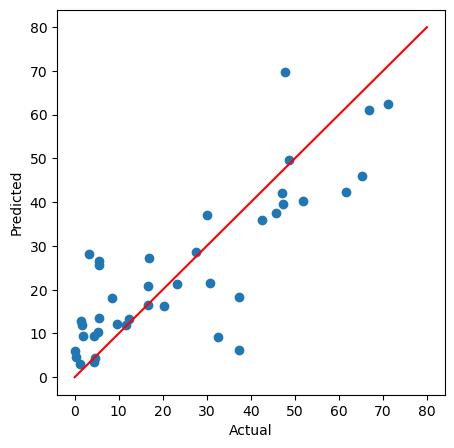

In [47]:
plt.figure(figsize=(5,5))
plt.scatter(y_test15,np.array([25.6869, 12.0299, 20.832 , 28.533 , 28.1252, 69.8685, 62.4917,
       40.2974, 37.0569, 37.4402, 21.2109, 26.6004, 18.3253,  9.4084,
        4.4953, 46.0245, 13.5579, 12.0242, 12.8628,  3.0812, 42.3837,
       13.3361, 35.8519, 49.6999, 16.3406,  4.5537, 61.1439,  9.1776,
       10.4133, 39.6741, 18.037 ,  6.2518,  6.0338,  9.394 , 27.2498,
       42.0303,  3.4069, 21.6324, 16.4631, 12.1688]))
plt.plot([0,80],[0,80], 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Not much to comment on here: both sets are predicted relatively well.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


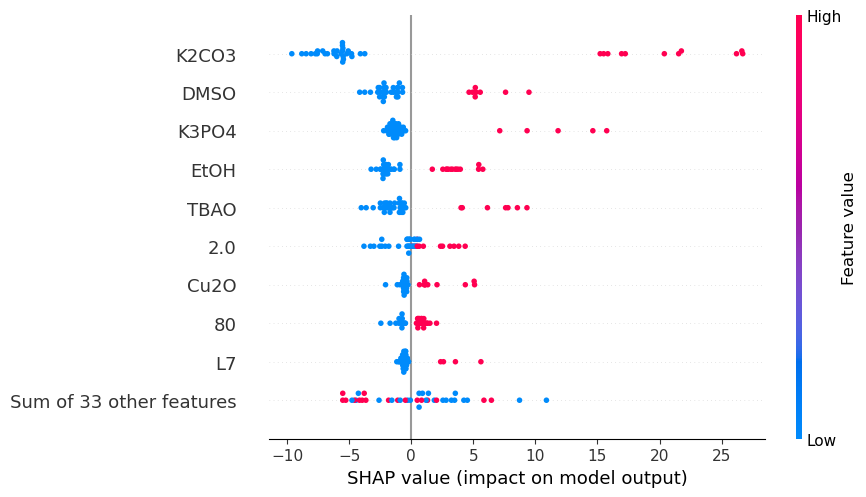

In [22]:
explainer = shap.Explainer(model, x_train70)
shap_values = explainer(x_val15, check_additivity=False)
shap.plots.beeswarm(shap_values)

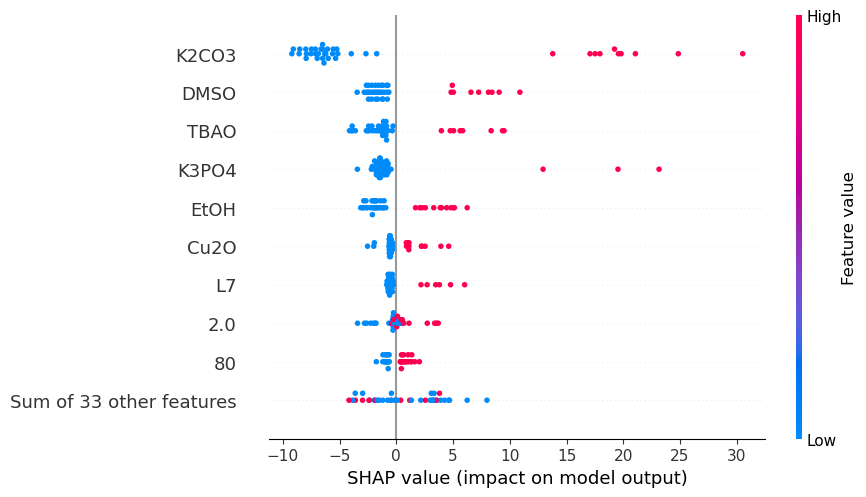

In [23]:
explainer = shap.Explainer(model, x_train70)
shap_values = explainer(x_test15, check_additivity=False)
shap.plots.beeswarm(shap_values)

Again, the sets do not show exactly the same higher SHAP values, but there are no unexpected impacts. Notice that the top three is consistently the same across most models: TBAO, DMSO and K2CO3 in different orders.

## 60/20/20

In [24]:
x_train60, x_temp, y_train60, y_temp = train_test_split(rxns_df_x, rxns_df_y, test_size=0.4, random_state=42)
x_val20, x_test20, y_val20, y_test20 = train_test_split(x_temp, y_temp, test_size=0.5,random_state=42)

In [25]:
model.fit(x_train60, y_train60)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(random_state=42)

In [26]:
validation(x_val20, y_val20)

Validation Accuracy with r2 :0.6448850486854609
Validation RMSE:12.819817906950101
Validation MAE:8.865681132075471


array([21.7665,  8.0595, 20.2371, 16.2027,  1.6498, 14.1058, 18.9491,
        4.8953, 16.7112,  4.1541, 27.4771,  4.1541, 16.5802, 10.8827,
       11.0662,  5.4329,  9.1836, 25.6847, 66.666 , 15.5556,  9.0256,
        2.2638, 38.1683, 18.0959, 20.9925, 13.8247,  1.5819, 52.7273,
       61.4995, 13.7551, 32.1752, 13.7588,  3.4624, 16.9289, 32.8322,
       15.3758, 13.374 , 10.8827,  6.7596, 24.1417,  7.9683, 22.9287,
       24.7951,  4.746 , 23.3153, 67.4532,  1.5819, 33.7404,  7.1863,
        7.1713, 33.7838,  7.0731, 20.4342])

In [27]:
testing(x_test20, y_test20)

Test Set Accuracy with r2 : 0.24821453393466586
Test RMSE:19.47656440803607
Test MAE:13.504671698113206


array([15.3864, 51.9661, 34.5777, 11.114 , 24.8283,  1.3935, 25.4267,
       11.2992, 14.3023, 43.8185, 53.9038, 62.9963,  8.374 , 36.8817,
       30.9379, 13.8926,  8.47  ,  5.6683, 12.1069, 23.429 , 31.2418,
       45.7261,  5.5834, 20.1   , 23.1768, 26.8488, 41.6254, 13.7542,
       32.5848, 32.6502, 53.3009, 20.9393, 34.5223, 35.7818,  3.4624,
       65.8825,  3.7328, 36.261 , 43.0583, 18.592 , 39.1731,  6.827 ,
        7.6215, 18.9072, 18.9498, 10.8827, 27.2451,  2.063 , 42.1717,
       53.279 , 40.7147, 30.6584,  5.6894])

This model appears to have a big overfitting issue. We might have given not enough training data and too much validation data here.

Text(0, 0.5, 'Predicted')

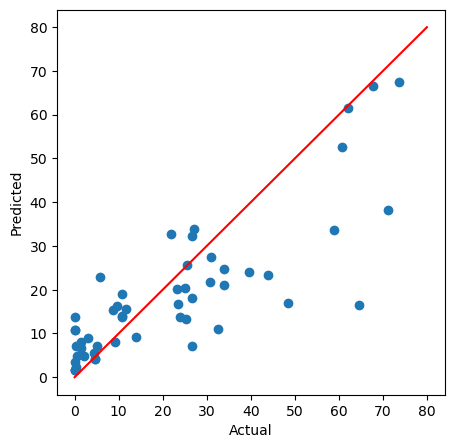

In [48]:
plt.figure(figsize=(5,5))
plt.scatter(y_val20,np.array([21.7665,  8.0595, 20.2371, 16.2027,  1.6498, 14.1058, 18.9491,
        4.8953, 16.7112,  4.1541, 27.4771,  4.1541, 16.5802, 10.8827,
       11.0662,  5.4329,  9.1836, 25.6847, 66.666 , 15.5556,  9.0256,
        2.2638, 38.1683, 18.0959, 20.9925, 13.8247,  1.5819, 52.7273,
       61.4995, 13.7551, 32.1752, 13.7588,  3.4624, 16.9289, 32.8322,
       15.3758, 13.374 , 10.8827,  6.7596, 24.1417,  7.9683, 22.9287,
       24.7951,  4.746 , 23.3153, 67.4532,  1.5819, 33.7404,  7.1863,
        7.1713, 33.7838,  7.0731, 20.4342]))
plt.plot([0,80],[0,80], 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

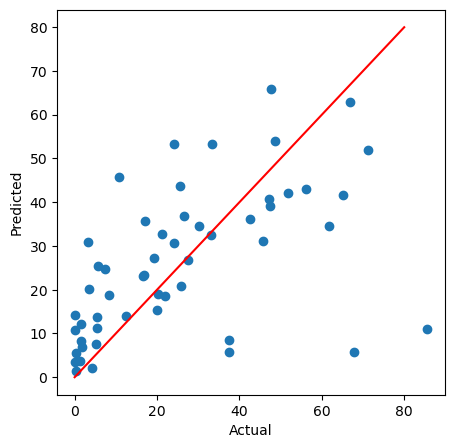

In [49]:
plt.figure(figsize=(5,5))
plt.scatter(y_test20,np.array([15.3864, 51.9661, 34.5777, 11.114 , 24.8283,  1.3935, 25.4267,
       11.2992, 14.3023, 43.8185, 53.9038, 62.9963,  8.374 , 36.8817,
       30.9379, 13.8926,  8.47  ,  5.6683, 12.1069, 23.429 , 31.2418,
       45.7261,  5.5834, 20.1   , 23.1768, 26.8488, 41.6254, 13.7542,
       32.5848, 32.6502, 53.3009, 20.9393, 34.5223, 35.7818,  3.4624,
       65.8825,  3.7328, 36.261 , 43.0583, 18.592 , 39.1731,  6.827 ,
        7.6215, 18.9072, 18.9498, 10.8827, 27.2451,  2.063 , 42.1717,
       53.279 , 40.7147, 30.6584,  5.6894]))
plt.plot([0,80],[0,80], 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')

The accuracy of the test set prediction is clearly very poor.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


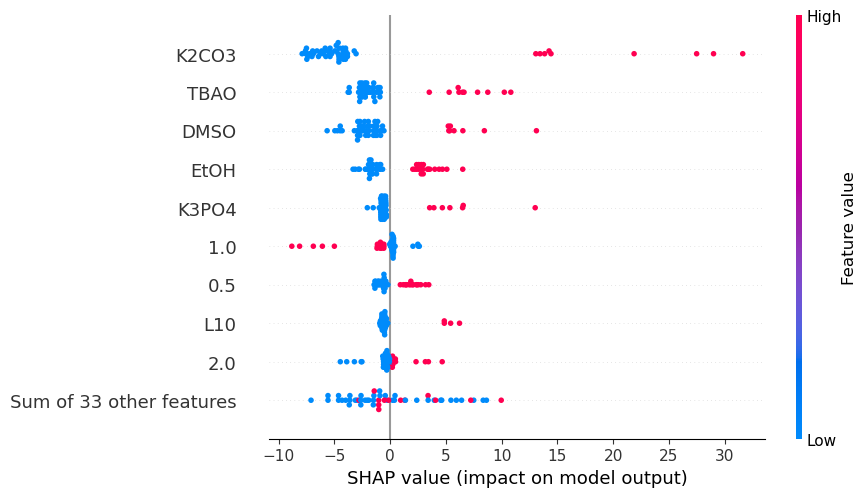

In [28]:
explainer = shap.Explainer(model, x_train60)
shap_values = explainer(x_val20, check_additivity=False)
shap.plots.beeswarm(shap_values)

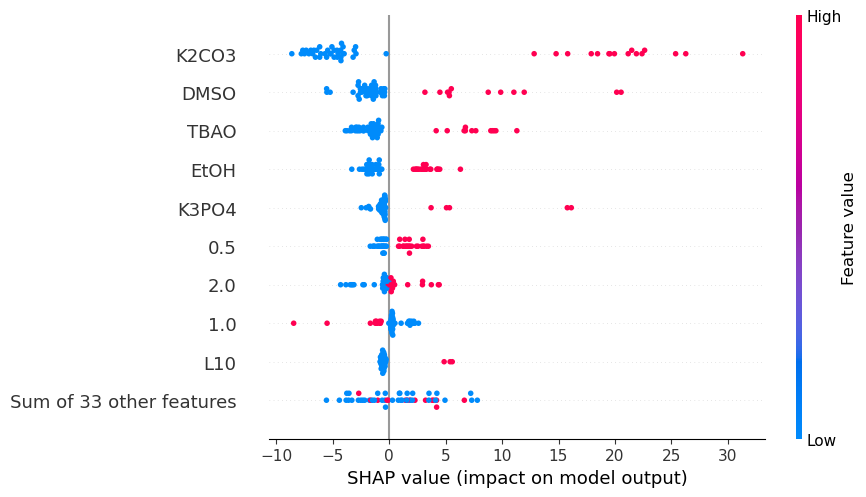

In [29]:
explainer = shap.Explainer(model, x_train60)
shap_values = explainer(x_test20, check_additivity=False)
shap.plots.beeswarm(shap_values)

Although the highest SHAP values are recurrent, more importance is given by this model to new features like different base equivalents which have lower SHAP values in more accurate models.

## 50/25/25

In [30]:
x_train50, x_temp, y_train50, y_temp = train_test_split(rxns_df_x, rxns_df_y, test_size=0.5, random_state=42)
x_val25, x_test25, y_val25, y_test25 = train_test_split(x_temp, y_temp, test_size=0.5,random_state=42)

In [31]:
model.fit(x_train50,y_train50)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(random_state=42)

In [32]:
validation(x_val25, y_val25)

Validation Accuracy with r2 :0.43318264327788514
Validation RMSE:17.88633066666054
Validation MAE:12.255240909090912


array([12.8288, 19.5096,  8.102 ,  8.3214,  8.9281, 15.8772, 12.7844,
       22.2541, 19.6465, 12.1648,  5.3182, 54.1934,  2.9671, 29.7995,
       12.8288, 49.1745, 41.2131, 10.7642,  7.7423,  6.7854, 21.0897,
       19.9423, 15.6858,  6.5728,  5.8294, 52.7491,  8.7031, 35.8369,
       17.7168, 10.4625, 24.3922, 22.6824,  5.8675,  2.1215, 35.3197,
       56.7584, 35.6065, 26.7484, 16.6145, 10.0067, 18.8158, 34.5385,
       20.9031,  5.3705,  9.4023, 12.8288,  8.5461, 41.267 ,  5.4378,
       11.3795, 16.3072,  4.6697, 16.1096, 19.891 ,  3.7847, 27.1112,
       56.8174,  3.8463, 39.9259,  2.1215, 37.4754,  7.5733, 22.7252,
        8.0396, 30.7005, 19.4454])

In [33]:
testing(x_test25, y_test25)

Test Set Accuracy with r2 : 0.4192858791687165
Test RMSE:16.6207108825879
Test MAE:10.976416666666667


array([17.1066,  2.728 , 36.307 , 27.6266, 20.4366, 39.6092, 12.965 ,
       62.97  , 13.0425, 24.0921, 16.7159, 46.8114, 45.4638, 33.2415,
        5.3705,  7.7123, 47.2081,  6.2604,  2.5544,  6.596 , 36.692 ,
       35.6237, 54.8819, 57.9665, 18.906 ,  1.7669,  6.8149,  4.8976,
       24.4877, 11.7715, 36.5782, 52.9368, 38.3111,  0.9243, 44.6992,
       32.7179,  9.3668, 29.4761, 41.3017,  5.3705, 20.5566, 41.8608,
        4.3712,  4.8976, 18.4736, 24.5463, 28.0307, 32.6576,  8.4439,
        8.9576, 21.601 ,  6.5357, 56.6626, 10.1214, 17.3275, 32.2257,
       28.4319,  9.4932,  2.9671, 39.7863, 20.3821,  7.4527,  8.6108,
       30.2187, 17.616 , 19.7871])

Both accuracies are very close and equally mediocre at best. At this point it's safe to assume that the training set is not big enough in comparison to the validation and testing sets, which is why the predictions are of poor quality.

Text(0, 0.5, 'Predicted')

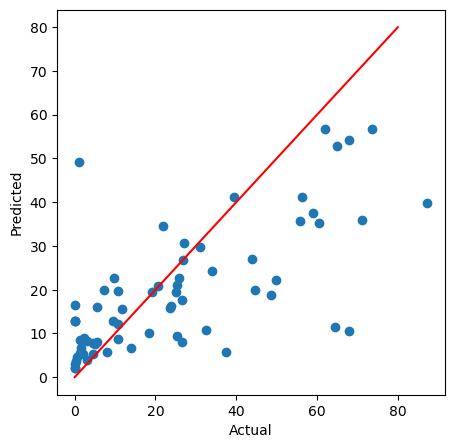

In [50]:
plt.figure(figsize=(5,5))
plt.scatter(y_val25,np.array([12.8288, 19.5096,  8.102 ,  8.3214,  8.9281, 15.8772, 12.7844,
       22.2541, 19.6465, 12.1648,  5.3182, 54.1934,  2.9671, 29.7995,
       12.8288, 49.1745, 41.2131, 10.7642,  7.7423,  6.7854, 21.0897,
       19.9423, 15.6858,  6.5728,  5.8294, 52.7491,  8.7031, 35.8369,
       17.7168, 10.4625, 24.3922, 22.6824,  5.8675,  2.1215, 35.3197,
       56.7584, 35.6065, 26.7484, 16.6145, 10.0067, 18.8158, 34.5385,
       20.9031,  5.3705,  9.4023, 12.8288,  8.5461, 41.267 ,  5.4378,
       11.3795, 16.3072,  4.6697, 16.1096, 19.891 ,  3.7847, 27.1112,
       56.8174,  3.8463, 39.9259,  2.1215, 37.4754,  7.5733, 22.7252,
        8.0396, 30.7005, 19.4454]))
plt.plot([0,80],[0,80], 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

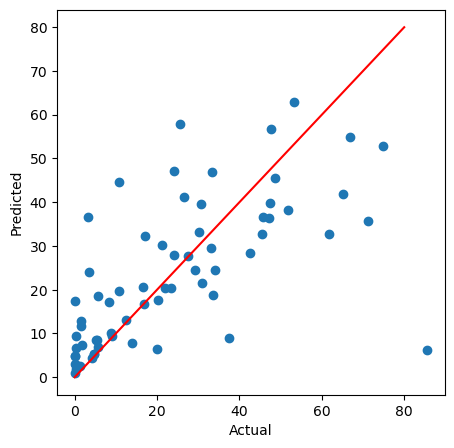

In [51]:
plt.figure(figsize=(5,5))
plt.scatter(y_test25,np.array([17.1066,  2.728 , 36.307 , 27.6266, 20.4366, 39.6092, 12.965 ,
       62.97  , 13.0425, 24.0921, 16.7159, 46.8114, 45.4638, 33.2415,
        5.3705,  7.7123, 47.2081,  6.2604,  2.5544,  6.596 , 36.692 ,
       35.6237, 54.8819, 57.9665, 18.906 ,  1.7669,  6.8149,  4.8976,
       24.4877, 11.7715, 36.5782, 52.9368, 38.3111,  0.9243, 44.6992,
       32.7179,  9.3668, 29.4761, 41.3017,  5.3705, 20.5566, 41.8608,
        4.3712,  4.8976, 18.4736, 24.5463, 28.0307, 32.6576,  8.4439,
        8.9576, 21.601 ,  6.5357, 56.6626, 10.1214, 17.3275, 32.2257,
       28.4319,  9.4932,  2.9671, 39.7863, 20.3821,  7.4527,  8.6108,
       30.2187, 17.616 , 19.7871]))
plt.plot([0,80],[0,80], 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Both plots visually demonstrate the poor accuracy of this model. It is worth to note at this point that all the models we have seen so far are most accurate when predicting experiments with very low yields (between 0 and 10-20 for the better models) in respect to the full data set.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


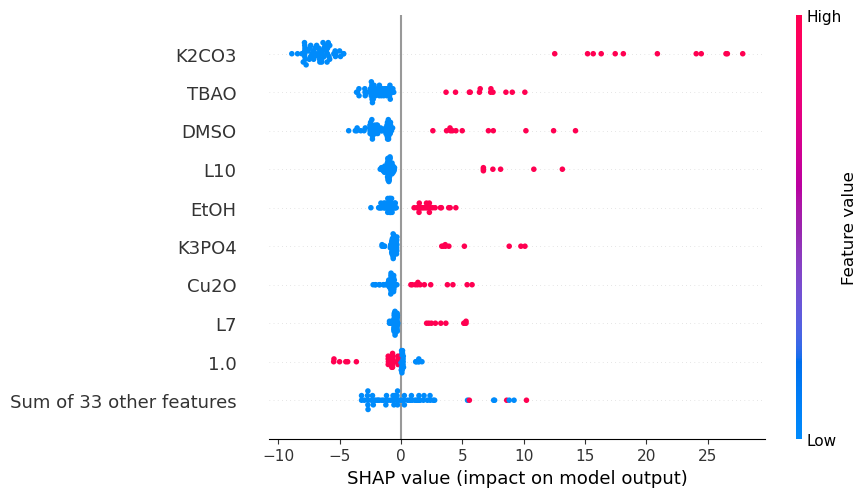

In [34]:
explainer = shap.Explainer(model, x_train50)
shap_values = explainer(x_val25, check_additivity=False)
shap.plots.beeswarm(shap_values)

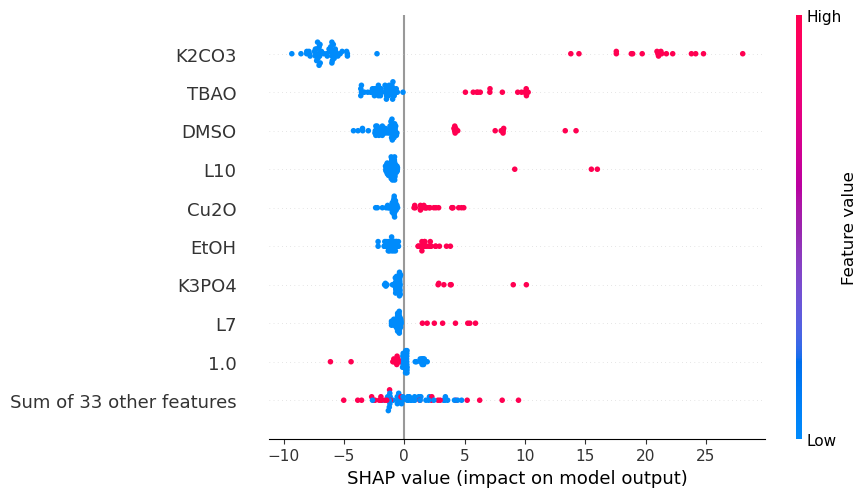

In [35]:
explainer = shap.Explainer(model, x_train50)
shap_values = explainer(x_test25, check_additivity=False)
shap.plots.beeswarm(shap_values)

Seeing L10's SHAP value this high is unexpected as even though this ligand leads to relatively high yields, it is not as influencial in more performant models. Qualitatively all the values make sense, but we cannot say the same quantitatively.

## Comparisons

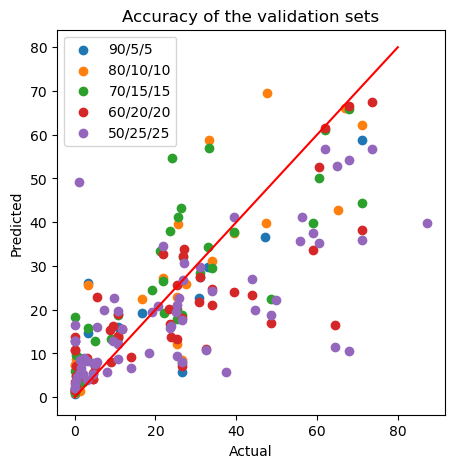

In [37]:
plt.figure(figsize=(5,5))
plt.scatter(y_val5, np.array([29.7027, 19.167 , 15.9561, 22.6753,  6.063 , 26.2045, 14.7148,
        0.8221,  2.1207, 58.862 ,  5.8443, 36.6741, 27.4172]), label='90/5/5')

plt.scatter(y_val10, np.array([39.6406,  4.9091, 22.9078, 58.8611, 25.78  , 39.8535, 27.3329,
       42.8717, 12.2276,  4.9586, 37.6225,  1.4443,  8.8389,  6.7382,
       31.1622, 62.1992, 22.4621, 25.692 ,  7.3174,  0.9164,  7.3174,
       66.2209,  8.4779, 69.5124,  8.835 ,  3.6469]), label='80/10/10')
plt.scatter(y_val15, np.array([19.3016, 18.7456, 13.4832,  3.5039, 37.9033,  2.015 , 28.2986,
       54.6787, 65.8264, 18.7775, 20.2663, 43.2772, 34.2367, 57.0326,
       44.3195, 15.8837, 29.5778,  1.0808, 24.5759, 33.4579,  1.1713,
       41.105 , 61.048 , 50.2097, 31.9953, 18.2578, 13.1994, 22.4525,
       26.6785, 17.8188,  6.0338,  9.0511, 37.6987,  5.4035,  4.8604,
        1.1713, 39.7762, 12.9484,  7.788 ,  9.5756]), label='70/15/15')
plt.scatter(y_val20,np.array([21.7665,  8.0595, 20.2371, 16.2027,  1.6498, 14.1058, 18.9491,
        4.8953, 16.7112,  4.1541, 27.4771,  4.1541, 16.5802, 10.8827,
       11.0662,  5.4329,  9.1836, 25.6847, 66.666 , 15.5556,  9.0256,
        2.2638, 38.1683, 18.0959, 20.9925, 13.8247,  1.5819, 52.7273,
       61.4995, 13.7551, 32.1752, 13.7588,  3.4624, 16.9289, 32.8322,
       15.3758, 13.374 , 10.8827,  6.7596, 24.1417,  7.9683, 22.9287,
       24.7951,  4.746 , 23.3153, 67.4532,  1.5819, 33.7404,  7.1863,
        7.1713, 33.7838,  7.0731, 20.4342]), label='60/20/20')
plt.scatter(y_val25, np.array([12.8288, 19.5096,  8.102 ,  8.3214,  8.9281, 15.8772, 12.7844,
       22.2541, 19.6465, 12.1648,  5.3182, 54.1934,  2.9671, 29.7995,
       12.8288, 49.1745, 41.2131, 10.7642,  7.7423,  6.7854, 21.0897,
       19.9423, 15.6858,  6.5728,  5.8294, 52.7491,  8.7031, 35.8369,
       17.7168, 10.4625, 24.3922, 22.6824,  5.8675,  2.1215, 35.3197,
       56.7584, 35.6065, 26.7484, 16.6145, 10.0067, 18.8158, 34.5385,
       20.9031,  5.3705,  9.4023, 12.8288,  8.5461, 41.267 ,  5.4378,
       11.3795, 16.3072,  4.6697, 16.1096, 19.891 ,  3.7847, 27.1112,
       56.8174,  3.8463, 39.9259,  2.1215, 37.4754,  7.5733, 22.7252,
        8.0396, 30.7005, 19.4454]), label='50/25/25')
plt.plot([0,80], [0,80], color='r')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Accuracy of the validation sets')
plt.legend()

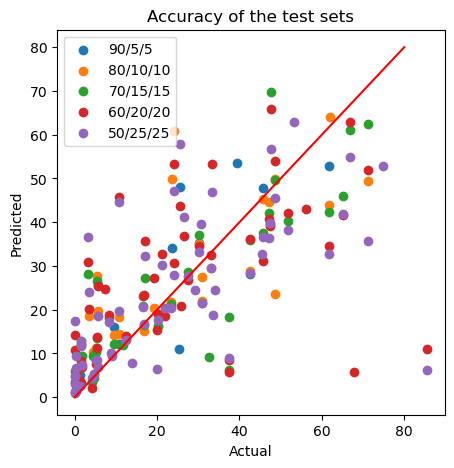

In [38]:
plt.figure(figsize=(5,5))
plt.scatter(y_test5, np.array([34.1275, 15.945 , 52.8496,  5.0471,  3.3446, 48.043 ,  8.4692,
       12.0824, 47.9121,  1.1291, 11.0765, 35.294 , 28.1919, 53.6155]), label='90/5/5')
plt.scatter(y_test10, np.array([44.5869, 49.4057, 49.9819, 45.4183, 20.3919, 28.894 , 14.4084,
       10.3234, 18.4118, 64.1319, 14.1176, 49.8433, 18.5918, 27.413 ,
       16.2901, 34.9763, 23.6212,  1.2328, 15.0898, 27.6813, 21.6884,
       29.5596, 44.0133, 11.3091, 19.7552, 60.8245, 22.0293]), label='80/10/10')
plt.scatter(y_test15, np.array([25.6869, 12.0299, 20.832 , 28.533 , 28.1252, 69.8685, 62.4917,
       40.2974, 37.0569, 37.4402, 21.2109, 26.6004, 18.3253,  9.4084,
        4.4953, 46.0245, 13.5579, 12.0242, 12.8628,  3.0812, 42.3837,
       13.3361, 35.8519, 49.6999, 16.3406,  4.5537, 61.1439,  9.1776,
       10.4133, 39.6741, 18.037 ,  6.2518,  6.0338,  9.394 , 27.2498,
       42.0303,  3.4069, 21.6324, 16.4631, 12.1688]), label='70/15/15')
plt.scatter(y_test20,np.array([15.3864, 51.9661, 34.5777, 11.114 , 24.8283,  1.3935, 25.4267,
       11.2992, 14.3023, 43.8185, 53.9038, 62.9963,  8.374 , 36.8817,
       30.9379, 13.8926,  8.47  ,  5.6683, 12.1069, 23.429 , 31.2418,
       45.7261,  5.5834, 20.1   , 23.1768, 26.8488, 41.6254, 13.7542,
       32.5848, 32.6502, 53.3009, 20.9393, 34.5223, 35.7818,  3.4624,
       65.8825,  3.7328, 36.261 , 43.0583, 18.592 , 39.1731,  6.827 ,
        7.6215, 18.9072, 18.9498, 10.8827, 27.2451,  2.063 , 42.1717,
       53.279 , 40.7147, 30.6584,  5.6894]), label='60/20/20')
plt.scatter(y_test25, np.array([17.1066,  2.728 , 36.307 , 27.6266, 20.4366, 39.6092, 12.965 ,
       62.97  , 13.0425, 24.0921, 16.7159, 46.8114, 45.4638, 33.2415,
        5.3705,  7.7123, 47.2081,  6.2604,  2.5544,  6.596 , 36.692 ,
       35.6237, 54.8819, 57.9665, 18.906 ,  1.7669,  6.8149,  4.8976,
       24.4877, 11.7715, 36.5782, 52.9368, 38.3111,  0.9243, 44.6992,
       32.7179,  9.3668, 29.4761, 41.3017,  5.3705, 20.5566, 41.8608,
        4.3712,  4.8976, 18.4736, 24.5463, 28.0307, 32.6576,  8.4439,
        8.9576, 21.601 ,  6.5357, 56.6626, 10.1214, 17.3275, 32.2257,
       28.4319,  9.4932,  2.9671, 39.7863, 20.3821,  7.4527,  8.6108,
       30.2187, 17.616 , 19.7871]), label='50/25/25')
plt.plot([0,80], [0,80], color='r')
plt.title('Accuracy of the test sets')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.legend()

Combining all the previously seen graphs, we are reminded that the size of the validation and testing sets are not the same through the models. In the same vein, it seems the models with bigger training sets tend to be more accurate than the opposite. Additionally as it was previously noticed, the models seem to be most reliable for experimental points with lower yields around 0 and 20% where we can observe many data points conglomerated around the linear ideal.

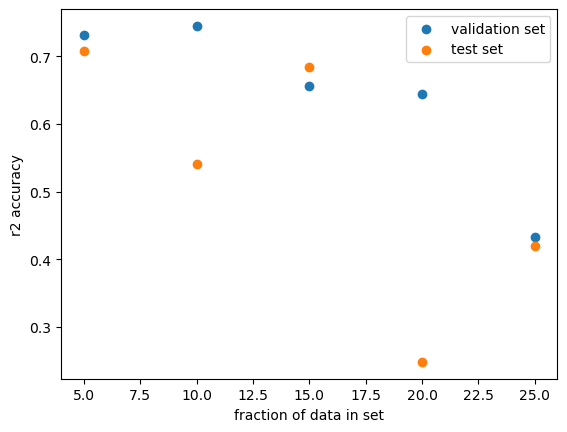

In [39]:
plt.scatter([5,10,15,20,25],[0.7317925098201055,0.7448681933302931,0.6559912518190225,0.6448850486854609,0.43318264327788514],
label = 'validation set')
plt.scatter([5,10,15,20,25],[0.7084584848512654,0.5411712063072343,0.6839271645671224,0.24821453393466586,0.4192858791687165], 
label = 'test set')
plt.ylabel('r2 accuracy')
plt.xlabel('fraction of data in set')
plt.legend()

The highest validation set accuracy is 0.7448681933302931 and the highest test set accuracy is 0.7084584848512654, the first reached with the model trained with 80% of the data and the second with 90% of it. Note that we are more interested in having a high test prediction score, so we can affirm that the model trained with 90% of the data set is the most satisfactory here.

Is the most performant model this one because it has the most data to train with, because it isn't fine-tuned as much as the others or because it has less points to test and as such less possible mistakes ? Or is it a combination of the three ? 